## Facial Emotion Classification on JAFFE using Pretrained ResNet34

In [14]:
#imports 
from fastai.imports import *
from fastai.conv_learner import *

In [15]:
#setting the path
Path='/home/parth/Github/JAFFE_FacialEmotion/DATASET/'

In [16]:
#ckecking the dataset 
import os
os.listdir(f'{Path}train')

['neutral', 'fear', 'sad', 'surprised', 'angry', 'happy', 'despair']

In [17]:
files = os.listdir(f'{Path}valid/fear')[:5]
files

['MK.FE3.133.tiff',
 'KA.FE4.48.tiff',
 'TM.FE3.198.tiff',
 'NA.FE3.219.tiff',
 'YM.FE4.70.tiff']

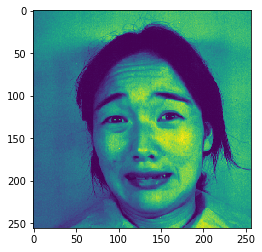

In [18]:
# plotting some images
img1 = plt.imread(f'{Path}valid/fear/{files[0]}')
img2 = plt.imread(f'{Path}valid/fear/{files[1]}')
plt.imshow(img1)

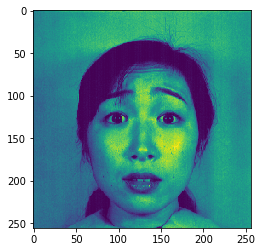

In [19]:
plt.imshow(img2)

In [20]:
# selecting image size and choosing the architecture
sz=224
arch=resnet34
bs=64

In [21]:
# training with data augmentation
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(Path, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [22]:
#training for 15 epochs
learn.fit(0.01,15)

epoch      trn_loss   val_loss   accuracy       
    0      2.492066   2.200859   0.195122  
    1      2.338349   2.032171   0.243902       
    2      2.303729   1.881931   0.219512       
    3      2.202594   1.736716   0.317073       
    4      2.069168   1.606406   0.414634       
    5      1.941946   1.480359   0.439024       
    6      1.839368   1.365335   0.414634       
    7      1.722689   1.271103   0.463415       
    8      1.626938   1.189606   0.512195       
    9      1.537037   1.117708   0.560976       
    10     1.454795   1.06247    0.560976               
    11     1.387275   1.021287   0.609756               
    12     1.326045   0.990745   0.609756       
    13     1.275008   0.969939   0.634146               
    14     1.216234   0.962119   0.658537       


[array([0.96212]), 0.6585365853658537]

In [23]:
# training with precompute false 
learn.precompute=False
learn.fit(0.01,5)

  0%|          | 0/3 [00:00<?, ?it/s]
epoch      trn_loss   val_loss   accuracy               
    0      1.431161   0.959089   0.658537  
    1      1.473244   0.956621   0.658537               
    2      1.451369   0.939032   0.658537               
    3      1.425526   0.917356   0.658537               
    4      1.427199   0.89762    0.634146               



[array([0.89762]), 0.6341463414634146]

In [24]:
# since vl and tl are decreasing train for more epochs
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy               
    0      1.251445   0.901356   0.609756  
    1      1.332002   0.90855    0.609756               
    2      1.345738   0.896958   0.634146               
    3      1.364423   0.880141   0.682927               
    4      1.330263   0.863206   0.707317               



[array([0.86321]), 0.7073170731707317]

In [30]:
# change size parameter to 64 and retrain
sz=64
arch=resnet34
bs=64
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(Path, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


In [31]:
learn.fit(0.01,15)

epoch      trn_loss   val_loss   accuracy       
    0      2.517668   2.236068   0.146341  
    1      2.384665   1.860905   0.170732       
    2      2.227494   1.65935    0.292683       
    3      2.068631   1.524706   0.414634       
    4      1.930744   1.411164   0.463415       
    5      1.822772   1.302917   0.439024       
    6      1.714763   1.212732   0.560976       
    7      1.631003   1.138281   0.585366       
    8      1.547984   1.074665   0.682927       
    9      1.466403   1.028917   0.780488       
    10     1.389609   0.997504   0.731707       
    11     1.328078   0.977188   0.756098       
    12     1.271856   0.960007   0.731707       
    13     1.213677   0.935501   0.780488       
    14     1.165711   0.904714   0.756098       



[array([0.90471]), 0.7560975609756098]

In [32]:
learn.precompute=False
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy               
    0      1.480318   0.879173   0.780488  
    1      1.42098    0.858202   0.780488               
    2      1.468827   0.83739    0.829268               
    3      1.386487   0.828314   0.829268               
    4      1.354502   0.82829    0.829268               



[array([0.82829]), 0.8292682926829268]

In [33]:
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy               
    0      1.168319   0.821862   0.829268  
    1      1.193612   0.817776   0.829268               



[array([0.81778]), 0.8292682926829268]

## Final Accuracy of 83% is achieved.